In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
sns.set_theme(style='white')
%matplotlib inline

## Example dataset: Iris (multivariate, small)
We will use the classic Iris dataset to explore relationships across multiple numeric variables.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame.copy()
df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


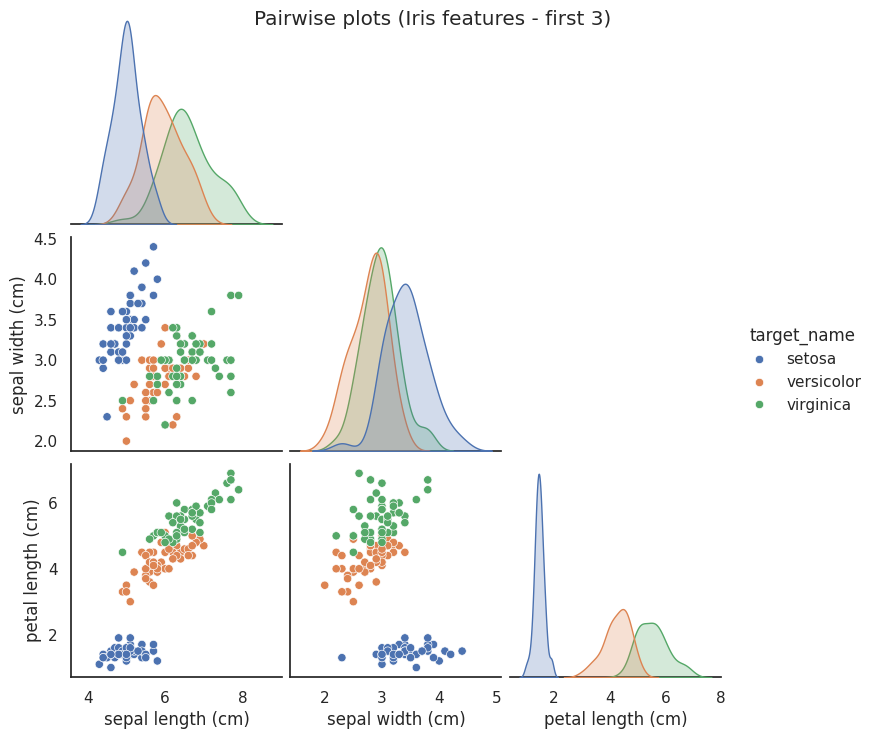

In [3]:
# Pairplot to inspect pairwise relationships (kept small)
sns.pairplot(df, vars=iris.feature_names[:3], hue='target_name', corner=True)
plt.suptitle('Pairwise plots (Iris features - first 3)')
plt.show()

## Correlation matrix — keep it short and interpret one value
We compute Pearson correlations for the selected features and explain how to read the matrix.

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)
sepal length (cm)           1.000000          -0.11757           0.871754
sepal width (cm)           -0.117570           1.00000          -0.428440
petal length (cm)           0.871754          -0.42844           1.000000


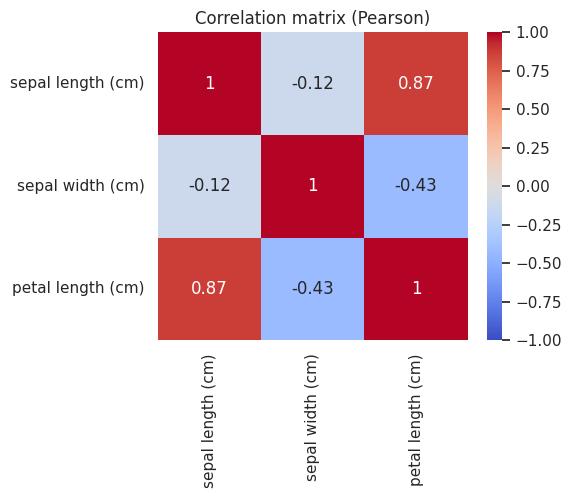

In [4]:
# Select three features to keep visuals clear
features = iris.feature_names[:3]
df_small = df[features].copy()
corr = df_small.corr()
print('Correlation matrix:')
print(corr)
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix (Pearson)')
plt.show()

## PCA (very short demo)
PCA finds new axes (components) that explain variance. We'll compute two components and plot them to show how dimensionality reduction works (briefly).

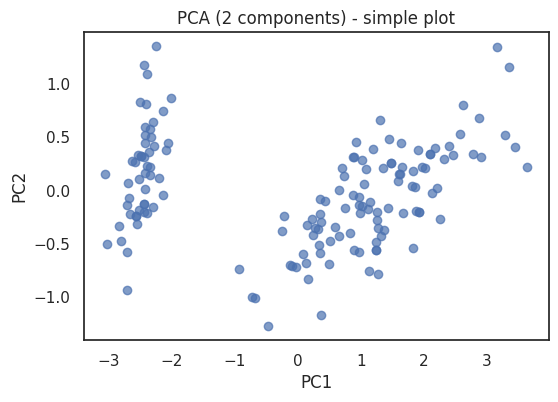

Explained variance (2 components): [0.92464061 0.06046599]
- Try changing features and re-running the small pipeline to see how results change.
- Use PCA to reduce dimensionality only when many features are correlated.
- Start with pairwise plots and a correlation matrix to find obvious relationships.


In [5]:
# Basic PCA on the selected features
X = df_small.values
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)
plt.figure(figsize=(6,4))
plt.scatter(Xp[:,0], Xp[:,1], alpha=0.7)
plt.title('PCA (2 components) - simple plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print('Explained variance (2 components):', pca.explained_variance_ratio_)
# Short notes for learners
print('- Try changing features and re-running the small pipeline to see how results change.')
print('- Use PCA to reduce dimensionality only when many features are correlated.')
print('- Start with pairwise plots and a correlation matrix to find obvious relationships.')

### Final notes
- Keep plots and feature counts small for beginners (3–5 features).
- Correlation helps spot linear relationships; PCA can summarize correlated variables.
- Always interpret components and link back to the original features.